# Introduction to Julia and IJulia/Jupyter
<table>
<tr>
<td> <a href="http://julialang.org"><img src="src/figures/julia.png" alt="Julia" style="width: 150px;"/></a></td>
<td> <a href="http://jupyter.org"><img src="src/figures/jupyter.png" alt="Jupyter" style="width: 150px;"/></a></td>
<td> <a href="https://github.com/JuliaLang/IJulia.jl"><img src="src/figures/ijulia.png" alt="IJulia" style="width: 150px;"/></a></td>
</tr></table>

This notebook is an introduction to the language **Julia**, and the use of the IJulia/Jupyter notebook in a statistics/optimization workflow. It is meant to be presented in 1 hour. It was created to be runned with Julia 0.5.

The Julia language will be introduced quickly, the aim is to motivate the readers to learn the language by themselves using more thorough teaching material.

## Why using Julia?
We introduce in this section **Julia**, a fast programming language that is particularly good at scientific computing.
<a href="http://julialang.org"><img src="src/figures/julia.png" alt="Julia" style="width: 150px;"/></a>

Quoting the [Julia website](http://julialang.org):
> Julia is a **high-level**, **high-performance** **dynamic** programming language for **technical computing**, with syntax that is familiar to users of other technical computing environments. It provides a sophisticated compiler, distributed parallel execution, numerical accuracy, and an extensive mathematical function library.

**High-level** language

- The syntax is easy to use and learn. 
- It will seem familiar to Python and Matlab users. 
- It is possible to do complicated computations quickly.

For example, Solving $Ax = b$ with 
$A = \begin{pmatrix}
 1 & 2 & 3\\ 
 2 & 1 & 2\\ 
 3 & 2 & 1
\end{pmatrix}$
and $b = \begin{pmatrix}
 1 \\ 
 1 \\ 
 1 
\end{pmatrix}$
is as simple as:

In [1]:
A = [1 2 3
     2 1 2
     3 2 1]

b = [1,1,1]
A\b

3-element Array{Float64,1}:
  0.25
 -0.0 
  0.25

A **dynamic** language:

- Julia is, like Python, Matlab or R, a dynamic language: you can interact with the language without the need to compile your code. Static or compiled languages, like C or Fortran, are more complicated to use but generally faster, and thus used when there is a need for time-efficient computations. 

- This is the _two-languages problem_: one generally use a high level language for research and scripting, and then translate the final result in a static language for performance.

A **High Performance** language:
- Julia solves the two languages problem using **just-in-time compilation**. While running, your code will be automatically compiled and optimized to reach performances comparable to static languages like C, Fortran and Go.
- Unlike R, Matlab or Python, simple loops are extremely efficient in Julia:

In [2]:
function countTo(n)
    count = 0
    for i = 1:n
        count += 1
    end
    return count
end
println("First use: slow like a dynamic language")
@time countTo(10_000_000)
println("Second use: compiled and optimized automatically")
@time countTo(10_000_000);

First use: slow like a dynamic language
  0.006574 seconds (1.52 k allocations: 72.265 KB)
Second use: compiled and optimized automatically
  0.000001 seconds (5 allocations: 176 bytes)


A language for **technical computing**
- Julia has a lot of built in functions for scientific computing.
- A growing number of packages, mostly written in Julia itself.
- More and more users in Finance, Biology, Optimization.
- Can run C and Python code seemlessly (using Scikit for Machine Learning...)


## Jupyter/IJulia notebook basics
We present, install and use the Jupyter notebooks, a formidable tool made available to Julia by the IJulia project.

### What is a Jupyter Notebook?
- Jupyter notebooks are **documents** (a little like a Word document) that can contain and run code.
- They were originally created for Python in the IPython projects, and adapted to Julia by the **IJulia** project.
- They are very useful to **prototype**, draw **plots**, or even for teaching material like this one.
- The document relies only on a modern browser for rendering, and can easily be **shared**.

### Installing IJulia and loading this notebook
Once Julia is installed, start julia and just run the following command to install the `IJulia` package
```jl
Pkg.install("IJulia")
```
This should work on its own. If there is any issue, check out the [IJulia website](https://github.com/JuliaLang/IJulia.jl).

Once IJulia is installed, go to the notebook file (_.ipynb_) directory, start julia and run:
```jl
using IJulia
notebook()
```
A webpage should open automatically, just click on the notebook to load it.

### Navigating the notebook

- Click `Help -> User Interface Tour` for a guided tour of the interface.
- Each notebook is composed of **cells**, that either contain code or text (`Markdown`).
- You can edit the content of a cell by double-clicking on it (_Edit Mode_).

When you are not editing a cell, you are in _Command mode_ and can edit the structure of the notebook (cells, name, options...)

- Create a cell by:
    - Clicking `Insert -> Insert Cell`
    - Pressing `a` or `b` in Command Mode
    - Pressing `Alt+Enter` in Edit Mode

- Delete a cell by:
    - Clicking `Edit -> Delete Cell`
    - Pressing `dd`

- Execute a cell by:
    - Clicking `Cell -> Run`
    - Pressing `Ctrl+Enter`

Other functions:
- Undo last text edit with `Ctrl+z` in Edit Mode
- Undo last cell manipulation with `z` in Command Mode
- Save notebook with `Ctrl+s` in Edit Mode
- Save notebook with `s` in Command Mode

Though notebooks rely on your browser to work, they do not require an internet connection (except for math rendering).


### Get comfortable with the notebook
Notebooks are designed to not be fragile. If you try to close a notebook with unsaved changes, the browser will warn you.

Try the following exercises:

>**\[Exercise\]**: Close/open

>1. Save the notebook
>2. Copy the address
>3. Close the tab
>4. Paste the address into a new tab (or re-open the last closed tab with `Ctrl+Shift+T` on Chrome)

>_The document is still there, and the Julia kernel is still alive! Nothing is lost._

>**\[Exercise\]**: Zoom

>Try changing the magnification of the web page (`Ctrl+, Ctrl-` on Chrome).

>_Text and math scale well (so do graphics if you use an SVG or PDF backend)._

>**\[Exercise\]**: MathJax
>1. Create a new cell, and select the type `Markdown` (or press `m`)
>2. Type an opening \$, your favorite mathematical expression, and a closing \$.
>3. Run the cell to render the $\LaTeX$ expression.
>4. Right-click the rendered expression.

## Coding in Julia
This section is a brief introduction to Julia. It is not a comprehensive tutorial but more a _taste_ of the language for those who do not know it, and a showcase of cool features for those who already know Julia.

Very good [tutorials](http://julialang.org/learning/) are available online and in books if you are interested in learning the language.

### Basic use
Julia, as a dynamic language, can simply be used as a calculator:

In [3]:
1+1

2

In [4]:
sin(exp(2*pi)+sqrt(3))

-0.01136232398070678

The building blocs of Julia code are variables:

In [5]:
a = 1
b = 2
# This is a comment 
c = a^2 + b^3 

9

Julia supports the common `if`, `while` and `for` structures:

In [6]:
if c >= 10
    print("Joey")
else
    print("Huchette")
end

Huchette

In [7]:
i = 1
while i <= 5
    println("Joey!") # Print with a new line
    i += 1
end

Joey!
Joey!
Joey!
Joey!
Joey!


In [8]:
for i = 1:3
    print("$i Joey") # '$' can be used to insert variables into text
    if i>1
        print("s")
    end
    println() # Just a new line
end

1 Joey
2 Joeys
3 Joeys


**Do not worry about writing loops**: in Julia, they are as fast as writing vectorized code, and sometimes faster!

**Arrays** (list of numbers) are at the core of research computing and Julia's arrays are extremely optimized.

In [9]:
myList = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

Array indexing starts with 1 in Julia:

In [10]:
myList[1]

1

In [11]:
myList[3] = 4
myList

3-element Array{Int64,1}:
 1
 2
 4

A 2-dimensional array is a Matrix

In [12]:
A = [1 2 3
     2 1 2
     3 2 1]

A = [1 2 3; 2 1 2; 3 2 1] #same thing

3×3 Array{Int64,2}:
 1  2  3
 2  1  2
 3  2  1

Matrix can be multiplied, inversed...

In [13]:
A^-1 #inverse

A^2 * A^-1

3×3 Array{Float64,2}:
 1.0  2.0  3.0
 2.0  1.0  2.0
 3.0  2.0  1.0

In [14]:
A*[1,2,3]

3-element Array{Int64,1}:
 14
 10
 10

In [15]:
eigenValues, eigenVectors = eig(A)
eigenValues

3-element Array{Float64,1}:
 -2.0     
 -0.701562
  5.70156 

**Types:** Everything has a type in Julia

In [16]:
typeof(1)

Int64

In [17]:
typeof(1.5)

Float64

In [18]:
typeof("abc")

String

Types are at the core of Julia's performance. **[multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)** is used dynamically when a function is called, selecting the right version of the function depending on the type of its argument.

In [19]:
1//2 # fraction in Julia

1//2

In [20]:
typeof(1//2)

Rational{Int64}

In [21]:
(1//2)^2

1//4

In [22]:
(0.5)^2 # The same function gives different results depending on the type

0.25

In [23]:
(im)^2 # This also works with complex numbers

-1 + 0im

In [24]:
function myFunction(x)
    println("Julia!")
end

function myFunction(x::Int) # only called when x is an integer
    println("IJulia!")
end

myFunction(1.0)
myFunction(1)
myFunction("Joey")

Julia!
IJulia!
Julia!


A lot more functionalities are available and for you to discover!

In [25]:
l = [i^2 for i in 1:10 if i%2 == 0] # list comprehensions (similar to Python)

5-element Array{Int64,1}:
   4
  16
  36
  64
 100

### Navigating Julia
Julia has a package manager to quickly download, install, update and uninstall new tools (_packages_)

In [ ]:
# Add Packages Plots, and Pyplot (can take some time)
Pkg.add("Plots")
Pkg.add("PyPlot")
# Update
Pkg.update()
#Remove:
# Pkg.rm("PyPlot")

Use `?` to get the documentation of a function

In [26]:
?eig

search: eig eigs eigmin eigmax eigvecs eigvals eigfact eigvals! eigfact!



```
eig(A,[irange,][vl,][vu,][permute=true,][scale=true]) -> D, V
```

Computes eigenvalues (`D`) and eigenvectors (`V`) of `A`. See [`eigfact`](:func:`eigfact`) for details on the `irange`, `vl`, and `vu` arguments and the `permute` and `scale` keyword arguments. The eigenvectors are returned columnwise.

```jldoctest
julia> eig([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
([1.0,3.0,18.0],
[1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0])
```

`eig` is a wrapper around [`eigfact`](:func:`eigfact`), extracting all parts of the factorization to a tuple; where possible, using [`eigfact`](:func:`eigfact`) is recommended.

```
eig(A, B) -> D, V
```

Computes generalized eigenvalues (`D`) and vectors (`V`) of `A` with respect to `B`.

`eig` is a wrapper around [`eigfact`](:func:`eigfact`), extracting all parts of the factorization to a tuple; where possible, using [`eigfact`](:func:`eigfact`) is recommended.

```jldoctest
julia> A = [1 0; 0 -1]
2×2 Array{Int64,2}:
 1   0
 0  -1

julia> B = [0 1; 1 0]
2×2 Array{Int64,2}:
 0  1
 1  0

julia> eig(A, B)
(Complex{Float64}[0.0+1.0im,0.0-1.0im],
Complex{Float64}[0.0-1.0im 0.0+1.0im; -1.0-0.0im -1.0+0.0im])
```


Use tab-completion to auto-complete functions and variables names: try ``myF<TAB>``:

In [ ]:
myF
fac

The ``methods`` function lists all of the different implementations of a function depending on the input types.
Click on the link to see the Julia source code.

In [27]:
methods(sin)

# 10 methods for generic function "sin":
sin(x::BigFloat) at mpfr.jl:610
sin(a::Complex{Float16}) at math.jl:480
sin(a::Float16) at math.jl:479
sin(x::Float32) at math.jl:203
sin(x::Float64) at math.jl:202
sin{T}(z::Complex{T}) at complex.jl:575
sin(x::Real) at math.jl:204
sin{Tv,Ti}(A::SparseMatrixCSC{Tv,Ti}) at sparse/sparsematrix.jl:1347
sin{Tv<:Number,Ti<:Integer}(x::AbstractSparseArray{Tv,Ti,1}) at sparse/sparsevector.jl:853
sin{T<:Number}(x::AbstractArray{T,N<:Any}) at operators.jl:555

### Plotting in IJulia
There are several Julia plotting packages. 

- [PyPlot.jl][3] is a Julia interface to Matplotlib, and should feel familiar to both MATLAB and Python users.
- [Gadfly][1] is written entirely in Julia, inspired by ggplot2, and concentrates on statistical graphics.
- [Plotly supports Julia][2].
- [Plots][4] is a _meta_ plotting package, that can use any other plotting package to make the same plot 
- And a lot more

Jupyter/IJulia will render the plots directly on the notebook!

[1]: https://github.com/dcjones/Gadfly.jl
[2]: https://plot.ly/julia/
[3]: https://github.com/stevengj/PyPlot.jl
[4]: https://juliaplots.github.io


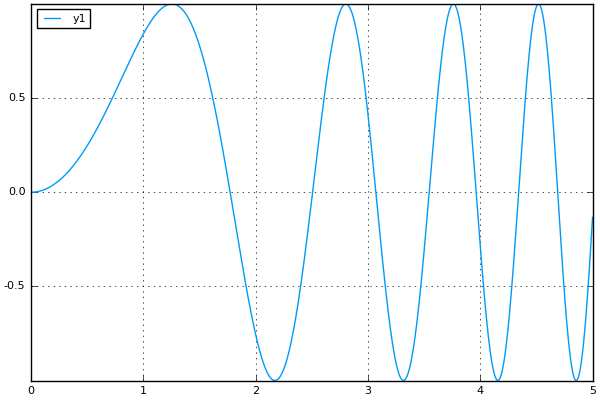

In [32]:
using Plots
pyplot() #plot using Matplotlib
x = linspace(0,5,1000)
plot(x, sin(x.^2))

Note that the first plot while always take a few seconds to be drawn, a consequence of Julia's just in time compilation. Lots of other plot types are available

## Advanced use of Julia and Notebooks
The following is just a sample of what can be done with Julia and notebooks. Feel free to explore by yourself any item of interest

### Notebooks
Jupyter notebooks have a lot of interesting hidden functionalities!

**Github and sharing**

If you save your .ipynb notebook file in a .git project, hosted on Github, you can easily visualize and share it online (in non-interactive mode).

For example, this notebook is available at https://github.com/sebmart/intro-julia-jupyter/blob/master/intro-julia-jupyter.ipynb

You can also use [Gist](https://gist.github.com) and [nbviewer](http://nbviewer.jupyter.org) to quickly share a notebook (for example to your advisor) without creating a git repo.

**Converting your notebook**

Jupyter notebooks are a popular format that can be converted to a variety of types of documents, depending on your needs:
- Latex
- HTML
- PDF
- Slides with Reveal.JS (used to present this notebook!)
- Markdown ...

These conversions use the [`nbconvert`](https://github.com/jupyter/nbconvert) command.

**Interactivity**

Julia code can be made interactive in the notebook using the [`Interact.jl`](https://github.com/JuliaGizmos/Interact.jl) Julia Package. Users can for example change the parameters of a plot dynamically:
![Interact.jl](src/figures/interact.png)

**Remote computing**

The Notebook system is a web interface. Notebooks can be run on another computer. This is useful if you want your code to run on a more powerful remote machine.

[Port-forwarding](www.google.com/search?q=port+forwarding+ssh) through SSH is a good start for this.

**Advanced Markdown**

Jupyter text cells use Markdown for formatting. Markdown is an easy to use formatting language (a little like HTML or LaTeX in more simple). You can use the text of this notebook as an example, or learn more [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

Jupyter uses _Github flavored Markdown_, and is particularly good at displaying math and colored code. You can even include a video!

### Julia
We only presented a small subset of Julia functionalities. We list here of few interesting things you may not know.

**Using the command line from Julia**

You can run bash command from Julia, just start the command with a semi-colon: `;`

In [40]:
;ls

LICENSE
intro-julia-jupyter.ipynb
intro-julia-jupyter.slides.html
src


**Unicode character** 

You can use unicode characters as part of variables and function names in Julia. You can use $\LaTeX$-style autocompletes in the Julia terminal or a Jupyter/IJulia code-cell to write them. Some of them are already defined Julia constants and functions
> Try to type `\pi<TAB>` in a cell.

In [41]:
π

π = 3.1415926535897...

In [42]:
"carrot" ∈ ["potato", "tomato", "carrot"]

true

**Juno**

Julia has a very nice and powerful text editor, [_Juno_](http://junolab.org), that is built on [Atom](https://atom.io). It is very similar to the Matlab interface or RStudio. Functionalities include:
- Autocomplete
- Integrated Plotting
- Debugging, Manual, ...

It is better suited for serious projects with several files, when an IJulia notebook is not enough.

**Advanced Julia functionalities**
Julia is a state-of-the-art programming language, with lots of useful functionalities, including:
- [Powerful Macros](http://docs.julialang.org/en/release-0.5/manual/metaprogramming/) (meta-programming)
- [Code testing](http://docs.julialang.org/en/release-0.5/stdlib/test/)
- [User-defined types](docs.julialang.org/en/release-0.5/manual/types/), that are as fast as built-in ones.
- [Package creation](http://docs.julialang.org/en/release-0.5/manual/modules/)
- A new [debugger](https://github.com/Keno/Gallium.jl) 

### Interesting Packages
Using the Package eco-system, there is almost nothing you cannot achieve:

-       Advanced Plotting   with [**Plots.jl**](https://juliaplots.github.io). Functionalities include 3D-plots, animated plots, stats plots, home-made plot "recipes" ...

- Call any python call using [**PyCall.jl**](https://github.com/JuliaPy/PyCall.jl). (you can also interacts with several other languages)

- Advanced graphs/networks algorithms with [**LightGraphs.jl**](https://github.com/JuliaGraphs/LightGraphs.jl)

- Applications in [**Finance**](https://github.com/JuliaQuant), [**Biology**](https://github.com/BioJulia/Bio.jl), [**Stats and Machine Learning**](http://juliastats.github.io), [**Optimization**](http://www.juliaopt.org) (including the great [**JuMP**](https://github.com/JuliaOpt/JuMP.jl) package!)

- Save and load your variables or environment to a file with [**JLD.jl**](https://github.com/JuliaIO/JLD.jl)

- More data structures in [**DataStructures.jl**](https://github.com/JuliaLang/DataStructures.jl)

- And a lot more in the **over 1200 registered packages**!

-------

Some content in this notebook was adapted from materials by [Miles Lubin](https://github.com/joehuchette/OR-software-tools-2015/blob/master/6-nonlinear-opt/IJulia%20intro.ipynb)